In [320]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt


##### Parsing the dates while reading the file.

##### The file downloaded from Kaggle is corrupt for trump tweets. Hence, I have saved it as an xlsx file. All files in the project can be found at the below link address.

###### https://uillinoisedu-my.sharepoint.com/:f:/g/personal/sbhing2_illinois_edu/EukRb0QIw5pFlqVJwlHkY-YBng0lsrZharURl2w8aagyeQ?e=KtYiTH


In [79]:
data_trump = pd.read_excel('hashtag_donaldtrump.xlsx', parse_dates=['created_at'])

In [251]:
len(data_trump.index)

442732

In [198]:
sampled_trump = data_trump
sampled_trump

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1316529221557250048.0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,ðŸŒ Noticias de interÃ©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000
2,2020-10-15 00:00:02,1316529228091840000.0,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746
4,2020-10-15 00:00:08,1316529252301449984.0,You get a tie! And you get a tie! #Trump â€˜s ...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.493
5,2020-10-15 00:00:17,1316529291052669952.0,@CLady62 Her 15 minutes were over long time ag...,2,0.0,Twitter for Android,1138416104,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,2363,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866
7,2020-10-15 00:00:18,1316529293497959936.0,@DeeviousDenise @realDonaldTrump @nypost There...,0,0.0,Twitter for iPhone,900761071631428992.0,Stacey Gulledge ðŸ‡ºðŸ‡¸ Patriot â™¥ï¸ KAG ðŸ...,sm_gulledge,"Patriot, Wife, â€œShaken not Stirredâ€ Mom of...",...,766,"Ohio, USA",40.225357,-82.68814,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971145,2020-11-08 23:59:25,1325588768448000000.0,"Donald Trump, Moscow, 1996, shared by @oooroma...",8,3.0,Twitter Web App,388137441,Elisabeth SchimpfÃ¶ssl,ElisabethSchimp,Author of Rich Russians,...,586,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,2020-11-09 17:47:55.816
971147,2020-11-08 23:59:34,1325588806679079936.0,@elnuevoherald LOS MEDIOS A LA FUERZA QUIEREN ...,0,0.0,Twitter Web App,1263450676228770048.0,RAÃšL,BSC_ROCK1,"""El #Correavirus es peor que el #Coronavirus""",...,61,Ecuador,-1.339767,-79.366697,NaN,Ecuador,South America,NaN,NaN,2020-11-09 17:47:55.857
971148,2020-11-08 23:59:36,1325588813406670080.0,13 emails from #Trump and Trumpettes today. 20...,1,0.0,Twitter for iPhone,357849201,murdoch davis,murdochdavis,"I try to be pithy, not pissy. Like you I fail....",...,1190,Valparaiso IN Team @mlh_holmes,-33.045846,-71.619675,ValparaÃ­so,Chile,South America,Valparaiso Region,NaN,2020-11-09 17:47:56.022
971149,2020-11-08 23:59:37,1325588820495010048.0,"unlike MUSSOLINI, HITLER, MAO, LENIN &amp; STA...",0,0.0,Twitter Web App,313536147,ActivistBowen,ActivistBowen2,"person, web writer, dissident, son, brother, f...",...,3792,Hong Kong,22.279328,114.162813,Hong Kong Island,China,Asia,Hong Kong,NaN,2020-11-09 17:47:56.080


In [199]:
options=['United States of America']
states = sampled_trump[sampled_trump['country'].isin(options)]
states['state'].unique()

array(['Florida', 'Oregon', 'District of Columbia', 'California', 'Ohio',
       'Pennsylvania', 'Illinois', 'Michigan', 'New Jersey',
       'Massachusetts', 'New Hampshire', 'Texas', 'South Dakota',
       'Georgia', 'Missouri', 'New York', 'Colorado', 'South Carolina',
       'Virginia', 'Alabama', 'Arizona', 'North Carolina', 'Tennessee',
       'Nebraska', 'Louisiana', 'Nevada', 'Minnesota', 'Indiana',
       'Washington', 'Hawaii', 'West Virginia', 'Vermont', 'Idaho',
       'Puerto Rico', 'Iowa', 'Kentucky', 'North Dakota', 'Arkansas',
       'Wisconsin', 'Utah', 'Montana', 'Kansas', 'Wyoming', 'Maine',
       'Connecticut', 'Maryland', 'New Mexico', 'Oklahoma', 'Alaska',
       'Delaware', 'Rhode Island', 'Mississippi', nan, 'Guam'],
      dtype=object)

In [200]:
sampled_trump.dropna(subset=['country'],inplace=True)

In [201]:
trump_date_fltr = sampled_trump.loc[(sampled_trump['created_at'] <= '2020-11-05')]

In [202]:
trump_tweets = trump_date_fltr[['tweet','state']]

In [230]:
def sentimentAnalysisTrump(trump_tweets : pd.DataFrame ,options : list) -> pd.DataFrame: 
    state_trump_tweets = trump_tweets
    state_trump_tweets = trump_tweets[trump_tweets['state'].isin([i])]
    
    state_trump_tweets['scores'] = state_trump_tweets['tweet'].apply(lambda review: sid.polarity_scores(review))
    
    state_trump_tweets['compound']  = state_trump_tweets['scores'].apply(lambda score_dict: score_dict['compound'])
    
    state_trump_tweets.loc[state_trump_tweets['compound'] > 0 , 'category'] = 1

    state_trump_tweets.loc[state_trump_tweets['compound'] < 0 , 'category'] = 0
    
#     print(return_tweet_trump)
    
    return state_trump_tweets

In [231]:
options=['Florida', 'Oregon', 'District of Columbia', 'California', 'Ohio',
       'Pennsylvania', 'Illinois', 'Michigan', 'New Jersey',
       'Massachusetts', 'New Hampshire', 'Texas', 'South Dakota',
       'Georgia', 'Missouri', 'New York', 'Colorado', 'South Carolina',
       'Virginia', 'Alabama', 'Arizona', 'North Carolina', 'Tennessee',
       'Nebraska', 'Louisiana', 'Nevada', 'Minnesota', 'Indiana',
       'Washington', 'Hawaii', 'West Virginia', 'Vermont', 'Idaho',
       'Puerto Rico', 'Iowa', 'Kentucky', 'North Dakota', 'Arkansas',
       'Wisconsin', 'Utah', 'Montana', 'Kansas', 'Wyoming', 'Maine',
       'Connecticut', 'Maryland', 'New Mexico', 'Oklahoma', 'Alaska',
       'Delaware', 'Rhode Island', 'Mississippi','Guam']

In [232]:
for i in options:
    globals()[f"{i}_trump_tweets"]=sentimentAnalysisTrump(trump_tweets,options)

In [234]:
Illinois_trump_tweets

,tweet,state,scores,compound,category
11,"In 2020, #NYPost is being #censorship #CENSORE...",Illinois,"{'neg': 0.103, 'neu': 0.811, 'pos': 0.086, 'co...",-0.4137,0.0
29,@karatblood @KazePlays_JC Grab @realDonaldTrum...,Illinois,"{'neg': 0.157, 'neu': 0.787, 'pos': 0.057, 'co...",-0.6229,0.0
36,Who does #trump owe 420 million dollars to? Wh...,Illinois,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.4705,0.0
57,@glennkirschner2 So basically the American exp...,Illinois,"{'neg': 0.08, 'neu': 0.852, 'pos': 0.068, 'com...",-0.1421,0.0
78,â€œWe have heard the Election called at midnig...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
...,...,...,...,...,...
652319,#trump Can't Do Too..Much Moving Around After ...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
652648,We should get rid of polling places and instea...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
653085,#STOPTHEBAOTCOUNT WHERE I'M BEHIND &amp;\n#STO...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
653206,#Trump and polarization drove record turnout. ...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN


In [207]:
data_biden = pd.read_csv('hashtag_joebiden.csv',parse_dates=['created_at'])

In [252]:
len(data_biden.index)

353770

In [260]:
sampled_biden = data_biden
sampled_biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
6,2020-10-15 00:00:25,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698
11,2020-10-15 00:00:57,1.3165294600327987e+18,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,Twitter for Android,9.607387225967534e+17,RLCompton,NewfoundStudio,"""There are things known and there are things u...",...,266.0,"Kentucky, USA",37.572603,-85.155141,NaN,United States of America,North America,Kentucky,KY,2020-10-21 00:00:05.696100113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059898,2020-11-08 23:59:15,1.325588729424212e+18,@elnuevoherald @ngameztorres LOS MEDIOS A LA F...,0.0,0.0,Twitter Web App,1263450676228771840.0,RAÚL,BSC_ROCK1,"""El #Correavirus es peor que el #Coronavirus""",...,61.0,Ecuador,-1.339767,-79.366697,NaN,Ecuador,South America,NaN,NaN,2020-11-09 18:32:45.739408
1059899,2020-11-08 23:59:16,1.325588732318265e+18,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,377229570.0,Tim Welch,TimFWelch,transportation nerd; data geek.\nsenior lectur...,...,444.0,"Auckland, NZ",-36.852095,174.76318,Auckland,New Zealand,Oceania,Auckland,AUK,2020-11-09 18:32:45.760347
1059902,2020-11-08 23:59:34,1.325588806679081e+18,@elnuevoherald LOS MEDIOS A LA FUERZA QUIEREN ...,0.0,0.0,Twitter Web App,1263450676228771840.0,RAÚL,BSC_ROCK1,"""El #Correavirus es peor que el #Coronavirus""",...,61.0,Ecuador,-1.339767,-79.366697,NaN,Ecuador,South America,NaN,NaN,2020-11-09 18:32:45.807233
1059904,2020-11-08 23:59:38,1.3255888248362353e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,387361991.0,flaquet,flaquet1,NaN,...,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547


In [261]:
sampled_biden.dropna(subset=['country'],inplace=True)

In [262]:
biden_date_fltr = sampled_biden.loc[(sampled_biden['created_at'] <= '2020-11-05')]

In [263]:
biden_tweets = biden_date_fltr[['tweet','state']]

In [264]:
def sentimentAnalysisBiden(biden_tweets : pd.DataFrame ,options : list) -> pd.DataFrame: 
    state_biden_tweets = biden_tweets
    
    state_biden_tweets = biden_tweets[biden_tweets['state'].isin([i])]
    
    state_biden_tweets['scores'] = state_biden_tweets['tweet'].apply(lambda review: sid.polarity_scores(review))
    
    state_biden_tweets['compound']  = state_biden_tweets['scores'].apply(lambda score_dict: score_dict['compound'])
    
    state_biden_tweets.loc[state_biden_tweets['compound'] > 0 , 'category'] = 1
    
    state_biden_tweets.loc[state_biden_tweets['compound'] < 0 , 'category'] = 0
    
    return state_biden_tweets

In [265]:
for i in options:
    globals()[f"{i}_biden_tweets"]=sentimentAnalysisBiden(biden_tweets,options)

In [266]:
Illinois_biden_tweets

,tweet,state,scores,compound,category
6,"In 2020, #NYPost is being #censorship #CENSORE...",Illinois,"{'neg': 0.103, 'neu': 0.811, 'pos': 0.086, 'co...",-0.4137,0.0
21,In an effort to find the truth about allegatio...,Illinois,"{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'comp...",0.5423,1.0
132,#HunterBiden #JoeBiden #CorruptDemocrats #Ukra...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
282,Why didn’t Joe come out and have a press confe...,Illinois,"{'neg': 0.059, 'neu': 0.941, 'pos': 0.0, 'comp...",-0.1779,0.0
315,It’s called censorship. Unacceptable. #Electi...,Illinois,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",-0.4588,0.0
...,...,...,...,...,...
526109,Me: When I found out #Biden won #Michigan and ...,Illinois,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.5719,1.0
526371,@newshour and @AP have called #Arizona for #Bi...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
526530,#trump Can't Do Too..Much Moving Around After ...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
526737,#Biden and #KamalaHarris promised #blackpeople...,Illinois,"{'neg': 0.087, 'neu': 0.755, 'pos': 0.158, 'co...",0.3696,1.0


In [375]:
def plotGraph(trump_tweets_category,biden_tweets_category,state):
    t_tweets = trump_tweets_category
    b_tweets = biden_tweets_category
    count_trump = t_tweets['category'].value_counts()
    count_biden = b_tweets['category'].value_counts()
    r_f = int(count_trump[1]) + int(count_biden[0])
    d_f = int(count_trump[0]) + int(count_biden[1])
    d = {"Democrat":d_f,"Republican":r_f}
    party = list(d.keys())
    tweets = list(d.values())
    fig = plt.figure(figsize = (12, 5))
    plt.barh(party,tweets,color = ['#5bc0de','#d9534f'],height=0.5)
#     plt.legend(list(d.values()))
    for index, value in enumerate(tweets):
        plt.text(value, index, str(value))

    plt.show()
#     courses = list(data.keys())
# values = list(data.values())
  
# fig = plt.figure(figsize = (10, 4))
 
# # creating the bar plot
# plt.bar(courses, values, color ='maroon',
#         width = 0.4)
 
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show()
#     df = pd.DataFrame({state:["Democrat","Republican"], "Tweets":[d_f,r_f]})
#     df.plot.bar(x=state, y='Tweets', rot=0,color = ['#5bc0de','#d9534f'],ax = ax)
#     ax.legend(df.index)
#     df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})


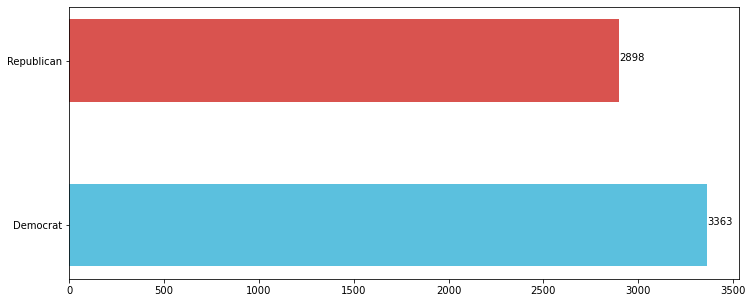

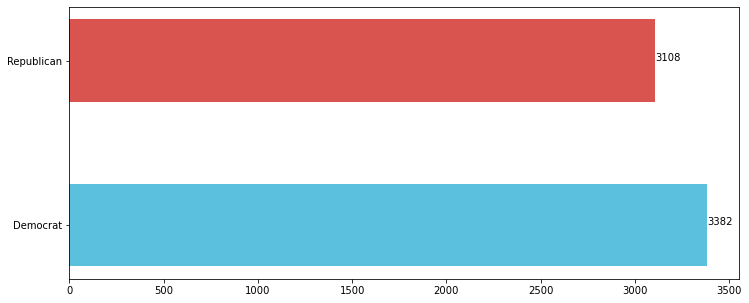

In [376]:
options1=['Illinois','Pennsylvania']
for i in options1:
    plotGraph(globals()[f"{i}_trump_tweets"],globals()[f"{i}_biden_tweets"],i)

In [272]:
Illinois_biden_tweets['category'].value_counts()
# t_f = a[1]
# t_a = a[0]
# t_a

1.0    1420
0.0    1064
Name: category, dtype: int64

In [273]:
Illinois_trump_tweets['category'].value_counts()
# t_f = a[1]
# t_a = a[0]
# t_a

0.0    1943
1.0    1834
Name: category, dtype: int64